<a href="https://colab.research.google.com/github/HafizAQ/DL_Practices/blob/main/GCNs_Building_a_Graph_Convolutional_Network_using_Putorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Graph Convolutional Network Layer in PyTorch

Courtesy: https://medium.com/@jrosseruk/demystifying-gcns-a-step-by-step-guide-to-building-a-graph-convolutional-network-layer-in-pytorch-09bf2e788a51


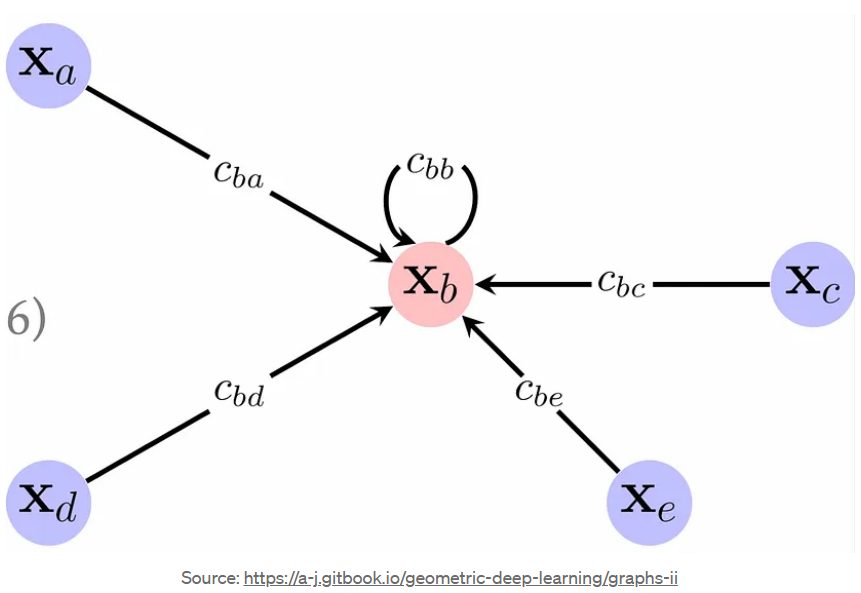





In [1]:
import torch  # dP-nn IMPLEMEtation
import torch.nn as nn
import torch.nn.functional as F


In [6]:
class GCNLayer(nn.Module):
  """
        GCN layer

        Args:
            input_dim (int): Dimension of the input
            output_dim (int): Dimension of the output (a softmax distribution)
            A (torch.Tensor): 2D adjacency matrix
  """
  def __init__(self, input_dim: int, output_dim: int, A: torch.Tensor):
    super(GCNLayer, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.A = A
    # A_hat = A + I
    self.A_hat = self.A + torch.eye(self.A.size(0))

    # Create diagornal degree matrix D
    self.ones = torch.ones(input_dim, input_dim)
    self.D = torch.matmul(self.A.float(), self.ones.float())

    #Extract diagonal elements
    self.D = torch.diag(self.D)

    #Create tensor with diagonal elemnts and zeros elsewhere
    self.D_neg_sqrt = torch.diag_embed(self.D)

    #Create D^{-1/2}
    self.D_neg_sqrt = torch.diag_embed(torch.diag(torch.pow(self.D, -0.5)))

    # Initialise the weight matrix as a parameter
    self.W = nn.Parameter(torch.rand(input_dim, input_dim))

  def forward(self, X: torch.Tensor):

    # D^-1/2 * (A_hat * D^-1/2)
    support_1 = torch.matmul(self.D_neg_sqrt, torch.matmul(self.A_hat, self.D_neg_sqrt))

    # (D^-1/2 * A_hat * D^-1/2) * (X * W)
    support_2 = torch.matmul(support_1, torch.matmul(X, self.W))

    # ReLU(D^-1/2 * A_hat * D^-1/2 * X * W)
    H = F.relu(support_2)

    return H

if __name__ == '__main__':

    #Example Usage
    input_dim = 3 # Assuming the input dimension is 3
    output_dim = 5 # Assuming the output dimension 5

     # Example adjacency matrix
    A = torch.tensor([[1., 0., 0.],
                      [0., 1., 1.],
                      [0., 1., 1.]])

    # Create the GCN Layer
    gcn_layer = GCNLayer(input_dim, output_dim, A)

    # Example input feature matrix
    X = torch.tensor([[1., 2., 3.],
                      [4., 5., 6.],
                      [7., 8., 9.]])

    # Forward pass
    output = gcn_layer(X)

    print(output)

tensor([[[ 8.8092,  9.4636,  8.4943],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [10.2883, 11.7491,  9.7352],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [16.1721, 18.7664, 15.2233]]], grad_fn=<ReluBackward0>)
